In [43]:
import pandas as pd
import numpy as np
# We are importing sklearn for kmeans clustering
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

In [15]:
## Delimiter  It is a sequence of one or more characters used to specify the boundary 
## between separate, independent regions in plain text or other data streams.

data = pd.read_csv('data-final.csv',delimiter="\t")

In [16]:
data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2018-11-08 12:04:58,1920.0,1080.0,3.0,160.0,10,2,US,39.9883,-75.2208
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,2018-11-08 12:07:18,1920.0,1080.0,3.0,122.0,7,1,US,38.0,-97.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,2018-11-08 12:07:49,1920.0,1080.0,2.0,135.0,12,6,US,36.1473,-86.777
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,2018-11-08 12:08:34,1920.0,1080.0,6.0,212.0,8,1,US,34.1067,-117.8067


In [17]:
columns = data.columns

In [18]:
for column in columns:
    print(column)

EXT1
EXT2
EXT3
EXT4
EXT5
EXT6
EXT7
EXT8
EXT9
EXT10
EST1
EST2
EST3
EST4
EST5
EST6
EST7
EST8
EST9
EST10
AGR1
AGR2
AGR3
AGR4
AGR5
AGR6
AGR7
AGR8
AGR9
AGR10
CSN1
CSN2
CSN3
CSN4
CSN5
CSN6
CSN7
CSN8
CSN9
CSN10
OPN1
OPN2
OPN3
OPN4
OPN5
OPN6
OPN7
OPN8
OPN9
OPN10
EXT1_E
EXT2_E
EXT3_E
EXT4_E
EXT5_E
EXT6_E
EXT7_E
EXT8_E
EXT9_E
EXT10_E
EST1_E
EST2_E
EST3_E
EST4_E
EST5_E
EST6_E
EST7_E
EST8_E
EST9_E
EST10_E
AGR1_E
AGR2_E
AGR3_E
AGR4_E
AGR5_E
AGR6_E
AGR7_E
AGR8_E
AGR9_E
AGR10_E
CSN1_E
CSN2_E
CSN3_E
CSN4_E
CSN5_E
CSN6_E
CSN7_E
CSN8_E
CSN9_E
CSN10_E
OPN1_E
OPN2_E
OPN3_E
OPN4_E
OPN5_E
OPN6_E
OPN7_E
OPN8_E
OPN9_E
OPN10_E
dateload
screenw
screenh
introelapse
testelapse
endelapse
IPC
country
lat_appx_lots_of_err
long_appx_lots_of_err


In [20]:
## We are getting only 50 columns data to train
A = data[data.columns[0:50]]

In [22]:
# We are setting max columns to see our entire data set
pd.set_option('display.max_columns', None)

In [23]:
A

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,5.0,4.0,2.0,5.0,2.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,4.0,3.0,5.0,1.0,5.0,5.0,4.0,4.0,4.0,5.0,2.0,4.0,1.0,4.0,3.0,5.0,3.0,3.0,5.0,3.0,3.0,2.0,3.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,3.0,2.0,4.0,3.0,2.0,2.0,4.0,2.0,4.0,1.0,3.0,5.0,5.0,3.0,2.0,3.0,2.0,4.0,3.0,5.0,4.0,5.0,3.0,5.0,1.0,5.0,1.0,4.0,1.0,4.0,5.0,1.0,5.0,1.0,4.0,1.0,5.0,5.0,4.0,5.0
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,4.0,4.0,2.0,2.0,4.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,2.0,4.0,2.0,4.0,4.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0


In [24]:
# We are filling missing value with zero
A = A.fillna(0)

In [29]:
# We are having batchSize 100.
# Batch is an amount of data we are going to train at a time
# And also we are setting max iterator 100 so we are going through entire dataset 100 times
kmeans = MiniBatchKMeans(n_clusters=10, random_state=0, batch_size=100, max_iter=100).fit(A)

In [30]:
len(kmeans.cluster_centers_)

10

In [31]:
## We are having 10 personality types so we are assingning that inti 10 variable
p1 = kmeans.cluster_centers_[0]
p2 = kmeans.cluster_centers_[1]
p3 = kmeans.cluster_centers_[2]
p4 = kmeans.cluster_centers_[3]
p5 = kmeans.cluster_centers_[4]
p6 = kmeans.cluster_centers_[5]
p7 = kmeans.cluster_centers_[6]
p8 = kmeans.cluster_centers_[7]
p9 = kmeans.cluster_centers_[8]
p10 = kmeans.cluster_centers_[9]

In [32]:
# We are going to calculate the score for personality type 1
p1_scores = {}

p1_scores['extroversion_score'] =  p1[0] - p1[1] + p1[2] - p1[3] + p1[4] - p1[5] + p1[6] - p1[7] + p1[8] - p1[9]
p1_scores['neuroticism_score'] =  p1[0] - p1[1] + p1[2] - p1[3] + p1[4] + p1[5] + p1[6] + p1[7] + p1[8] + p1[9]
p1_scores['agreeableness_score'] =  -p1[0] + p1[1] - p1[2] + p1[3] - p1[4] - p1[5] + p1[6] - p1[7] + p1[8] + p1[9]
p1_scores['conscientiousness_score'] =  p1[0] - p1[1] + p1[2] - p1[3] + p1[4] - p1[5] + p1[6] - p1[7] + p1[8] + p1[9]
p1_scores['openness_score'] =  p1[0] - p1[1] + p1[2] - p1[3] + p1[4] - p1[5] + p1[6] + p1[7] + p1[8] + p1[9]

In [33]:
p1_scores

{'extroversion_score': 9.418439308022236,
 'neuroticism_score': 22.81672951267956,
 'agreeableness_score': -2.472352551740031,
 'conscientiousness_score': 14.16176851558679,
 'openness_score': 19.690221927981366}

In [36]:
#No we are going to do the same for rest of the personalities
all_personality_types = {'p1':p1, 'p2': p2, 'p3' :p3, 'p4':p4, 'p5':p5, 'p6': p6, 'p7': p7, 'p8': p8,
             'p9': p9, 'p10': p10}

all_personality_types_scores ={}

for name, personality_type in all_personality_types.items():
    personality_trait = {}

    personality_trait['extroversion_score'] =  personality_type[0] - personality_type[1] +personality_type[2] - personality_type[3] + personality_type[4] - personality_type[5] +personality_type[6] - personality_type[7] + personality_type[8] -personality_type[9]
    personality_trait['neuroticism_score'] =  personality_type[0] - personality_type[1] + personality_type[2] -personality_type[3] + personality_type[4] + personality_type[5] + personality_type[6] + personality_type[7] + personality_type[8] + personality_type[9]
    personality_trait['agreeableness_score'] =  -personality_type[0] +personality_type[1] - personality_type[2] + personality_type[3] - personality_type[4] - personality_type[5] + personality_type[6] - personality_type[7] + personality_type[8] + personality_type[9]
    personality_trait['conscientiousness_score'] = personality_type[0] - personality_type[1] + personality_type[2] -personality_type[3] +personality_type[4] - personality_type[5] +personality_type[6] -personality_type[7] + personality_type[8] + personality_type[9]
    personality_trait['openness_score'] =  personality_type[0] -personality_type[1] + personality_type[2] - personality_type[3] + personality_type[4] - personality_type[5] +personality_type[6] + personality_type[7] + personality_type[8] + personality_type[9]
    
    all_personality_types_scores[name] = personality_trait

In [37]:
all_personality_types_scores

{'p1': {'extroversion_score': 9.418439308022236,
  'neuroticism_score': 22.81672951267956,
  'agreeableness_score': -2.472352551740031,
  'conscientiousness_score': 14.16176851558679,
  'openness_score': 19.690221927981366},
 'p2': {'extroversion_score': -12.106881315082008,
  'neuroticism_score': 12.675431820288606,
  'agreeableness_score': 3.1387386830639694,
  'conscientiousness_score': -2.735438618175065,
  'openness_score': 6.084757284553353},
 'p3': {'extroversion_score': 0.4408099688473518,
  'neuroticism_score': 1.3909657320872277,
  'agreeableness_score': -0.4885773624091373,
  'conscientiousness_score': 0.776220145379024,
  'openness_score': 1.036863966770509},
 'p4': {'extroversion_score': 6.063536261232744,
  'neuroticism_score': 21.75743576762436,
  'agreeableness_score': -1.7647133274269127,
  'conscientiousness_score': 11.796861156815591,
  'openness_score': 17.5417668649538},
 'p5': {'extroversion_score': -4.32482916919505,
  'neuroticism_score': 16.819090837136894,
  '

In [38]:
all_extroversion = []
all_neuroticism =[]
all_agreeableness =[]
all_conscientiousness =[]
all_openness =[]

for personality_type, personality_trait in all_personality_types_scores.items():
    all_extroversion.append(personality_trait['extroversion_score'])
    all_neuroticism.append(personality_trait['neuroticism_score'])
    all_agreeableness.append(personality_trait['agreeableness_score'])
    all_conscientiousness.append(personality_trait['conscientiousness_score'])
    all_openness.append(personality_trait['openness_score'])

In [39]:
all_extroversion_normalized = (all_extroversion-min(all_extroversion))/(max(all_extroversion)-min(all_extroversion))
all_neuroticism_normalized = (all_neuroticism-min(all_neuroticism))/(max(all_neuroticism)-min(all_neuroticism))
all_agreeableness_normalized = (all_agreeableness-min(all_agreeableness))/(max(all_agreeableness)-min(all_agreeableness))
all_conscientiousness_normalized = (all_conscientiousness-min(all_conscientiousness))/(max(all_conscientiousness)-min(all_conscientiousness))
all_openness_normalized = (all_openness-min(all_openness))/(max(all_openness)-min(all_openness))

In [40]:
all_extroversion_normalized

array([1.        , 0.        , 0.58292703, 0.84414155, 0.36153014,
       0.63839681, 0.96798501, 0.27017414, 0.21386007, 0.51772601])

In [44]:
counter = 0

normalized_all_personality_types_scores ={}

for personality_type, personality_trait in all_personality_types_scores.items():
    normalized_personality_trait ={}
    normalized_personality_trait['extroversion_score'] = all_extroversion_normalized[counter]
    normalized_personality_trait['neuroticism_score'] = all_neuroticism_normalized[counter]
    normalized_personality_trait['agreeableness_score'] = all_agreeableness_normalized[counter]
    normalized_personality_trait['conscientiousness_score'] = all_conscientiousness_normalized[counter]
    normalized_personality_trait['openness_score'] = all_openness_normalized[counter]
    
    normalized_all_personality_types_scores[personality_type] = normalized_personality_trait
    
    counter+=1

In [45]:
normalized_all_types_scores

{'p1': {'extroversion_score': 1.0,
  'neuroticism_score': 1.0,
  'agreeableness_score': 0.0,
  'conscientiousness_score': 1.0,
  'openness_score': 1.0},
 'p2': {'extroversion_score': 0.0,
  'neuroticism_score': 0.5266774246070499,
  'agreeableness_score': 1.0,
  'conscientiousness_score': 0.0,
  'openness_score': 0.2706157962700227},
 'p3': {'extroversion_score': 0.5829270329409761,
  'neuroticism_score': 0.0,
  'agreeableness_score': 0.35354534551605604,
  'conscientiousness_score': 0.20782480416763896,
  'openness_score': 0.0},
 'p4': {'extroversion_score': 0.8441415528469063,
  'neuroticism_score': 0.9505598140676451,
  'agreeableness_score': 0.1261143679011729,
  'conscientiousness_score': 0.8600415240193192,
  'openness_score': 0.8848220750657754},
 'p5': {'extroversion_score': 0.361530138488812,
  'neuroticism_score': 0.7200735181736958,
  'agreeableness_score': 0.5500146874169198,
  'conscientiousness_score': 0.3895502283488151,
  'openness_score': 0.5814584822317371},
 'p6': {'

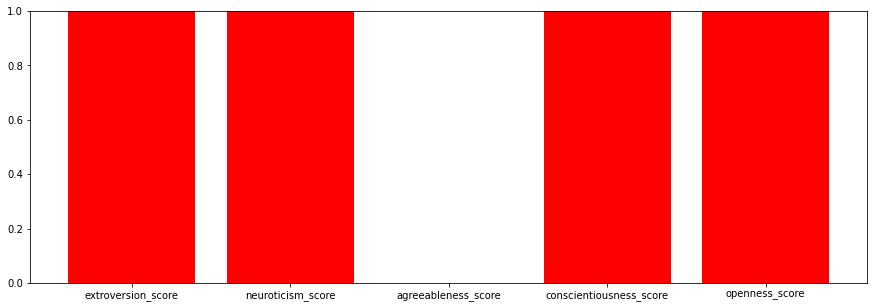

In [46]:
## Personality type 1
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_personality_types_scores['p1'].keys()), normalized_all_personality_types_scores['p1'].values(), color='r')
plt.show()

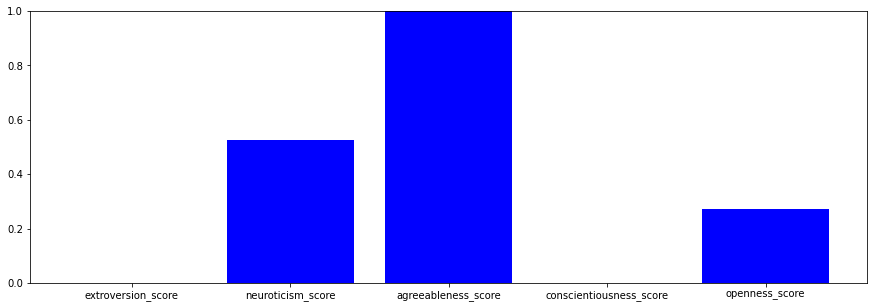

In [47]:
# Personality type 2
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_personality_types_scores['p2'].keys()), normalized_all_personality_types_scores['p2'].values(), color='b')
plt.show()

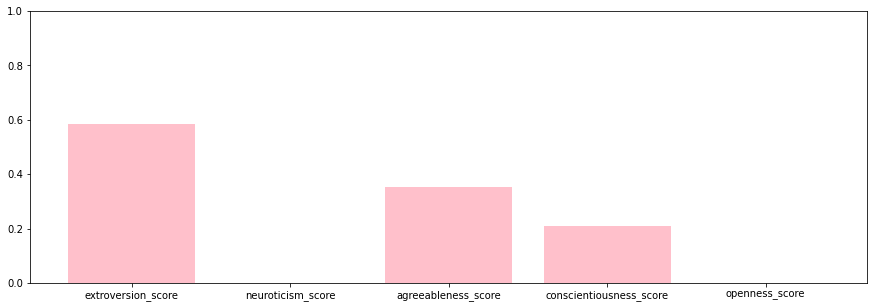

In [52]:
# Personality type 3
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_personality_types_scores['p3'].keys()), normalized_all_personality_types_scores['p3'].values(), color='pink')
plt.show()

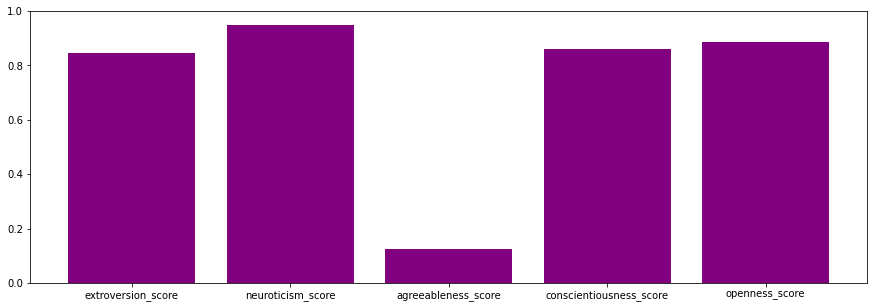

In [51]:
# Personality type 4
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_personality_types_scores['p4'].keys()), normalized_all_personality_types_scores['p4'].values(), color='purple')
plt.show()

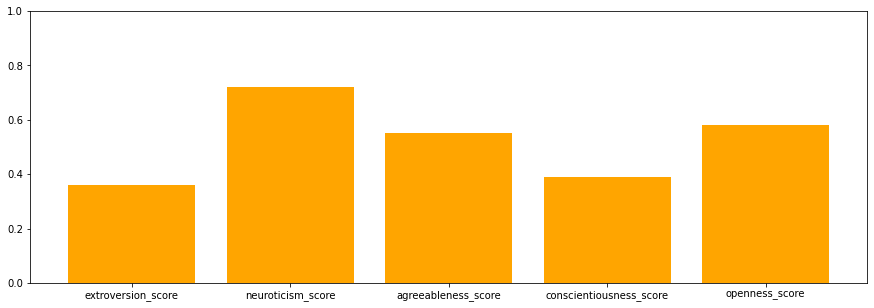

In [53]:
# Personality type 5
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_personality_types_scores['p5'].keys()), normalized_all_personality_types_scores['p5'].values(), color='orange')
plt.show()

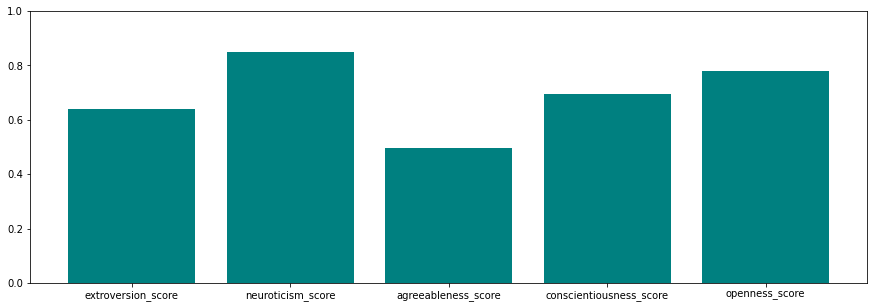

In [56]:
# Personality type 6
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_personality_types_scores['p6'].keys()), normalized_all_personality_types_scores['p6'].values(), color='teal')
plt.show()

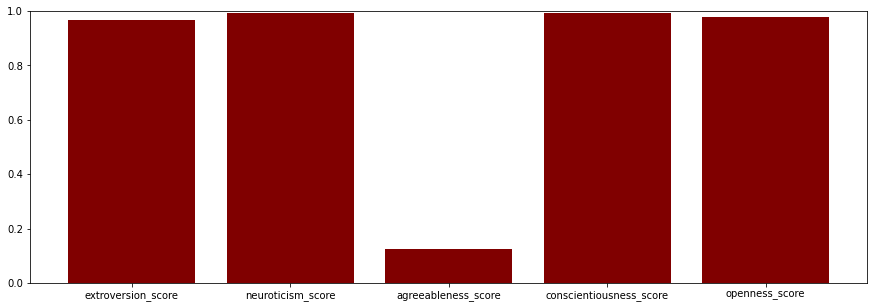

In [57]:
# Personality type 7
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_personality_types_scores['p7'].keys()), normalized_all_personality_types_scores['p7'].values(), color='maroon')
plt.show()

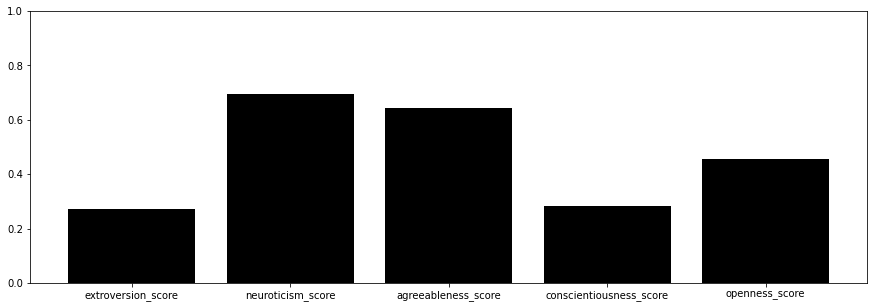

In [62]:
# Personality type 8
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_personality_types_scores['p8'].keys()), normalized_all_personality_types_scores['p8'].values(), color='black')
plt.show()

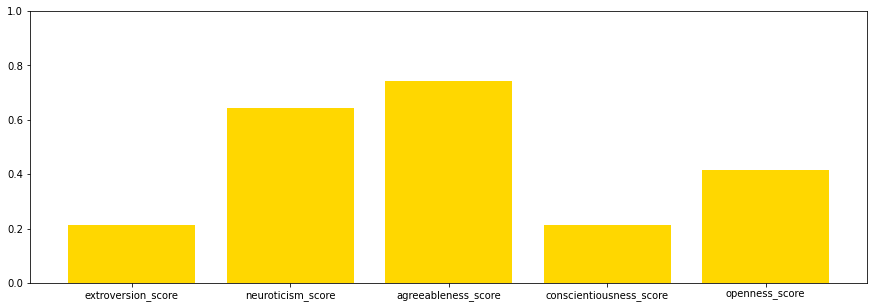

In [64]:
# Personality type 9
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_personality_types_scores['p9'].keys()), normalized_all_personality_types_scores['p9'].values(), color='gold')
plt.show()

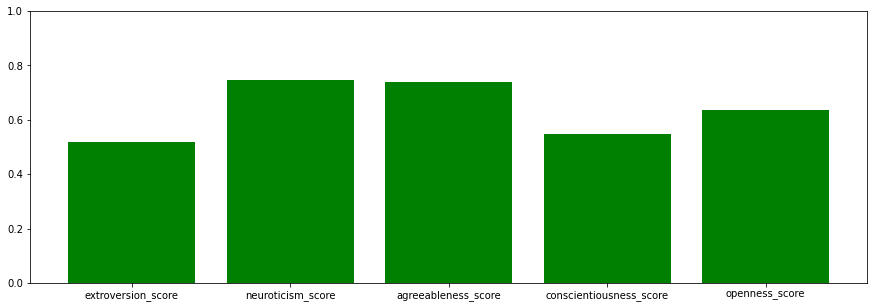

In [66]:
# Personality type 10
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_personality_types_scores['p10'].keys()), normalized_all_personality_types_scores['p10'].values(), color='green')
plt.show()